In [2]:
import numpy as np
import pandas as pd
import csv
import os
import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
#from sklearn.impute import SimpleImputer
#from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#from sklearn.model_selection import cross_validate
#from sklearn.metrics import confusion_matrix, roc_curve
import warnings
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().magic('matplotlib inline')
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=10)
np.random.seed(11)

## **Importing dataset from drive, which we have downloaded from**[Bureau of Transportation Statistics](https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr)

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/1_sep_2021.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/2_oct_2021.csv')
df3 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/3_nov_2021.csv')
df4 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/4_dec_2021.csv')
df5 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/5_jan_2022.csv')
df6 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/6_feb_2022.csv')
df7 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/7_mar_2022.csv')
df8 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/8_apr_2022.csv')
df9 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/9_may_2022.csv')
df10 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/10_jun_2022.csv')
df11 = pd.read_csv('/content/drive/MyDrive/AI Project/data file/11_jul_2022.csv')
FLIGHT_RAW = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis = 0)

### Let' see how our dataset looks like, and we will describe it a little bit before diving into Exploratory Data Analysis.



In [4]:
FLIGHT_RAW

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,...,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,AIR_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2021,3,9,2,4,9/2/2021 12:00:00 AM,ZW,N413AW,3930,ORD,...,2100-2159,0.0,NaN,42.0,1.0,126.0,0.0,18.0,0.0,0.0
1,2021,3,9,2,4,9/2/2021 12:00:00 AM,ZW,N464AW,3929,IAD,...,1200-1259,0.0,NaN,97.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2021,3,9,2,4,9/2/2021 12:00:00 AM,ZW,N448AW,3928,ORD,...,1600-1659,0.0,NaN,30.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2021,3,9,2,4,9/2/2021 12:00:00 AM,ZW,N468AW,3927,GSO,...,1600-1659,0.0,NaN,40.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2021,3,9,2,4,9/2/2021 12:00:00 AM,ZW,N468AW,3927,IAD,...,1200-1259,0.0,NaN,42.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618785,2022,3,7,25,1,7/25/2022 12:00:00 AM,WN,N959WN,2107,SDF,...,1800-1859,0.0,NaN,48.0,1.0,NaN,NaN,NaN,NaN,NaN
618786,2022,3,7,25,1,7/25/2022 12:00:00 AM,WN,N776WN,2691,SDF,...,1100-1159,0.0,NaN,45.0,1.0,NaN,NaN,NaN,NaN,NaN
618787,2022,3,7,25,1,7/25/2022 12:00:00 AM,WN,N8734Q,3084,SDF,...,2000-2059,0.0,NaN,47.0,1.0,NaN,NaN,NaN,NaN,NaN
618788,2022,3,7,25,1,7/25/2022 12:00:00 AM,WN,N751SW,4343,SDF,...,0600-0659,0.0,NaN,50.0,1.0,NaN,NaN,NaN,NaN,NaN


#### Our dataset has 6398538 rows and 37 columns. Below some information is shown about the what are the columns and what's the data types.

In [7]:
FLIGHT_RAW.info()
#FLIGHT_RAW.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6398538 entries, 0 to 618789
Data columns (total 37 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   DAY_OF_WEEK          int64  
 5   FL_DATE              object 
 6   OP_UNIQUE_CARRIER    object 
 7   TAIL_NUM             object 
 8   OP_CARRIER_FL_NUM    int64  
 9   ORIGIN               object 
 10  ORIGIN_STATE_NM      object 
 11  DEST                 object 
 12  DEST_STATE_NM        object 
 13  DEP_TIME             float64
 14  DEP_DELAY            float64
 15  DEP_DELAY_NEW        float64
 16  DEP_DEL15            float64
 17  DEP_DELAY_GROUP      float64
 18  DEP_TIME_BLK         object 
 19  TAXI_OUT             float64
 20  WHEELS_OFF           float64
 21  WHEELS_ON            float64
 22  TAXI_IN              float64
 23  ARR_TIME             float64
 24 

### DATA VISUALIZATION:

<Figure size 7000x4000 with 0 Axes>

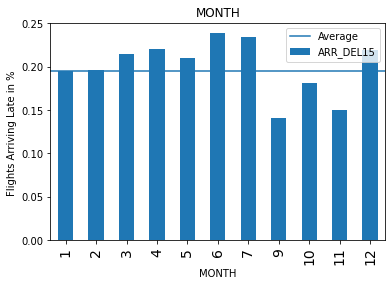

<Figure size 7000x4000 with 0 Axes>

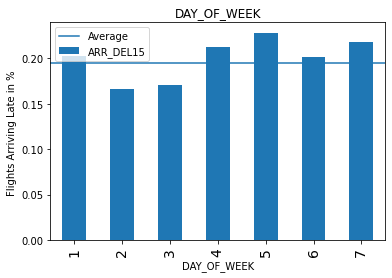

<Figure size 7000x4000 with 0 Axes>

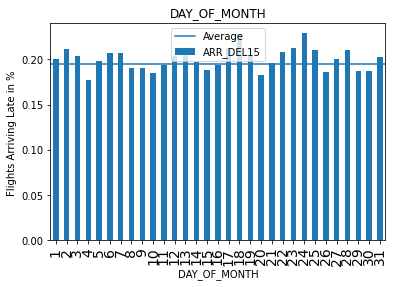

<Figure size 7000x4000 with 0 Axes>

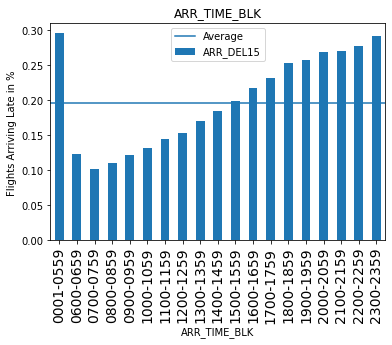

<Figure size 7000x4000 with 0 Axes>

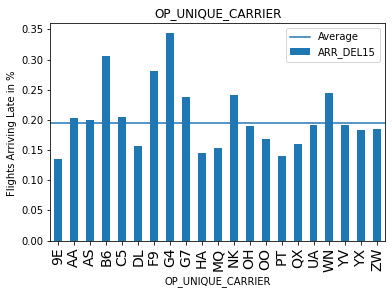

In [6]:
AvgLate = np.sum(FLIGHT_RAW['ARR_DEL15'])/len(FLIGHT_RAW['ARR_DEL15'])
COLUMNS = ['MONTH','DAY_OF_WEEK', 'DAY_OF_MONTH','ARR_TIME_BLK','OP_UNIQUE_CARRIER']
#plt.figure(figsize=(20, 12), dpi=500)
for i,pred in enumerate(COLUMNS):
    plt.figure(figsize=(14, 8), dpi=500)
    GROUPED = FLIGHT_RAW.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ARR_DEL15']]
    GROUPED.sort_values(by=pred, inplace=True)    
    GROUPED.plot.bar(x=pred, y='ARR_DEL15')
    plt.axhline(y=AvgLate, label='Average')
    plt.ylabel('Flights Arriving Late in % ')
    plt.title(pred)
    plt.legend()
    plt.show()

## Insights regarding above graphs
- As the data is from Aug 2021 - July 2022, It has information about flights delay of 1 whole year.<br>
- Graph 1: Flights are mostly delayed in month of June and July and after that the months having more delayes are April and December. <br>

- Graph 2: Thursdays, fridays, and sundays are the week-days on which flights mostly delay over 15 mins. <br>

- Graph 3: Third and fourth week of months have more delayed flights <br>

- Graph 4: Flights in day time rarely get delayed<br>

- Graph 5:  These are the flight carriers having the most delayed flights than others
        1. G4 - ALLEGIENT AIR LLC 
        2. B6 - JET BLUES
        3. F9 - FRONTIER AIRLINES         
        4. WN - SOUTHWEST AIRLINES

In [70]:
## ----------- It will take more than 20 mins to plot 
#sns.lineplot(x = 'DATE', y = 'AIR_TIME', data=FLIGHT_RAW, hue = 'ARR_DEL15')

### Let's dive into EDA

In [4]:
## AS WE SAW ABOVE THAT FL_DATE IS AN OBJECT, INSTEAD OF MAKING IT INTO DATETIME FORMAT, WE WILL SIMPLY DO THIS:
FLIGHT_RAW['DAY'] = FLIGHT_RAW['DAY_OF_MONTH']
FLIGHT_RAW['DATE'] = pd.to_datetime(FLIGHT_RAW[['YEAR', 'MONTH', 'DAY']])

In [8]:
#   CHECKING SPARSITY OF THE DATASET SO THAT WE CAN REMOVE HIGHLY SPARSE DATA TO MANUALLY REDUCE DIMENSIONS
##     We will be calculating sparsity in terms of percentage

##      SPARSITY: sparsity is basically missing data in the dataset, we will remove highly(>90%) sparse data. 
print('DIMENSIONS:')
print(len(FLIGHT_RAW.columns))
print(' SPARSITY PER VARIABLE:')
((len(FLIGHT_RAW.index) - FLIGHT_RAW.count())/len(FLIGHT_RAW.index))  # -------> Sparsity per variable retained

DIMENSIONS:
39
 SPARSITY PER VARIABLE:


YEAR                   0.000000
QUARTER                0.000000
MONTH                  0.000000
DAY_OF_MONTH           0.000000
DAY_OF_WEEK            0.000000
FL_DATE                0.000000
OP_UNIQUE_CARRIER      0.000000
TAIL_NUM               0.005533
OP_CARRIER_FL_NUM      0.000000
ORIGIN                 0.000000
ORIGIN_STATE_NM        0.000000
DEST                   0.000000
DEST_STATE_NM          0.000000
DEP_TIME               0.024580
DEP_DELAY              0.024593
DEP_DELAY_NEW          0.024593
DEP_DEL15              0.024593
DEP_DELAY_GROUP        0.024593
DEP_TIME_BLK           0.000000
TAXI_OUT               0.025023
WHEELS_OFF             0.025023
WHEELS_ON              0.025413
TAXI_IN                0.025413
ARR_TIME               0.025410
ARR_DELAY              0.027421
ARR_DEL15              0.027421
ARR_DELAY_GROUP        0.027421
ARR_TIME_BLK           0.000000
CANCELLED              0.000000
CANCELLATION_CODE      0.974851
AIR_TIME               0.027421
FLIGHTS 

In [5]:
## THE ABOVE RESULT SHOWS THAT COLUMNS :
#           CANCELLATION_CODE
#           CARRIER_DELAY
#           WHEATHER_DELAY
#           NAS_DELAY
#           SECURITY_DELAY
#           LATE_AIRCRAFT_DELAY
## HAVE HIGHLY SPARSE DATA AND IF YOU LOOK CLOSELY INTO THE DATA, IT DOESN'T MAKE SENSE KEEPING IT. SO WE WILL DROP ALL THESE COLUMNS, ALSO WITH THAT WE WILL REMOVE SOME REDUNDANT DATA.
FLIGHT_RAW.drop(['CANCELLATION_CODE',
           'CARRIER_DELAY',
           'WEATHER_DELAY',
           'NAS_DELAY',
           'SECURITY_DELAY', 
           'LATE_AIRCRAFT_DELAY', 
           'FL_DATE', 'DAY'],
          axis=1, inplace=True)

In [10]:
FLIGHT_RAW.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'ORIGIN_STATE_NM', 'DEST', 'DEST_STATE_NM', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'AIR_TIME', 'FLIGHTS', 'DATE'],
      dtype='object')

##### NOW WE WILL BISECT THE RAW DATA INTO **NUMERICAL**, **CATEGORICAL** AND **DATETIME** SECTIONS: just for exploratory analysis to give you better understanding.

In [11]:
NUMERICAL= FLIGHT_RAW[['YEAR', 
                   'QUARTER', 
                   'MONTH', 
                   'DAY_OF_MONTH', 
                   'DAY_OF_WEEK', 
                   'DEP_TIME', 
                   'DEP_DELAY_GROUP', 
                   'TAXI_OUT', 
                   'WHEELS_OFF', 
                   'WHEELS_ON', 
                   'ARR_TIME', 
                   'ARR_DEL15', 
                   'AIR_TIME', 
                   'FLIGHTS']]

CATEGORICAL = FLIGHT_RAW[['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_STATE_NM', 'DEST', 'DEST_STATE_NM', 'DEP_TIME_BLK', 'ARR_TIME_BLK']]

DATE_TIME = pd.DataFrame(FLIGHT_RAW['DATE'], columns = ['DATE'])

In [12]:
## NOW TO ENCODE CATEGORICAL DATA INTO NUMERICAL-VALUES, WE HAVE CREATED A FUNCTION.
def encode_categories(df):
    LE = LabelEncoder()
    for i in df.columns:
        df[i] = LE.fit_transform(df[i])


encode_categories(CATEGORICAL)

- WILL TRY TO GET VISUAL REPRESENTATION OF OUR NUMERICAL COLUMNS USING BOX PLOTS

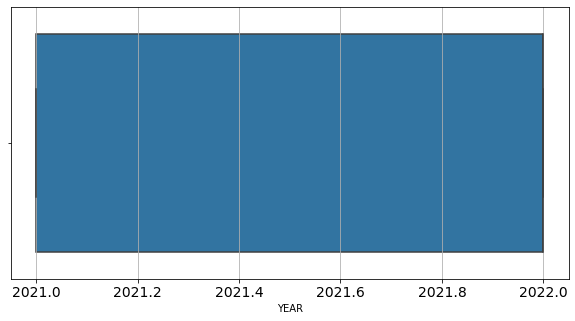

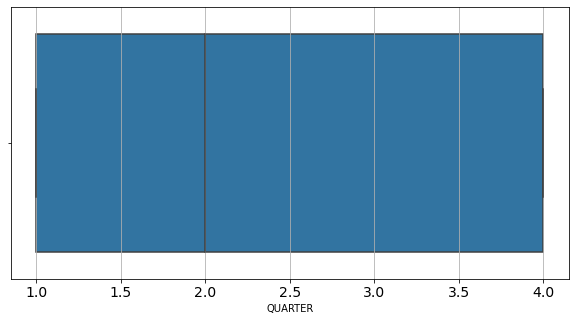

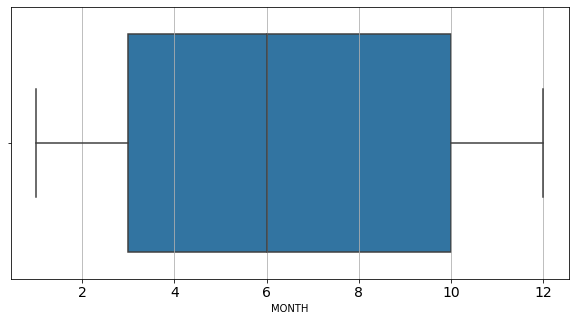

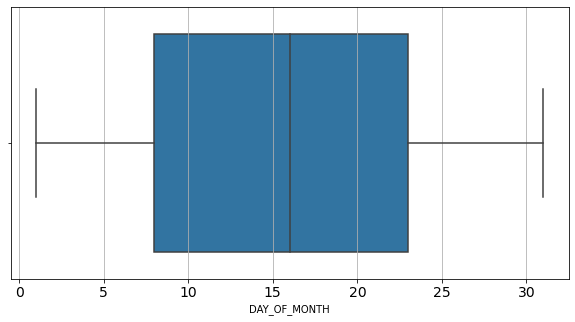

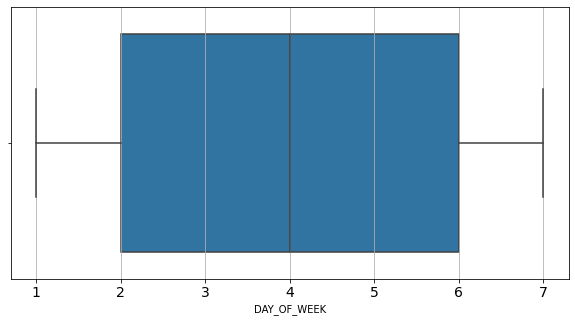

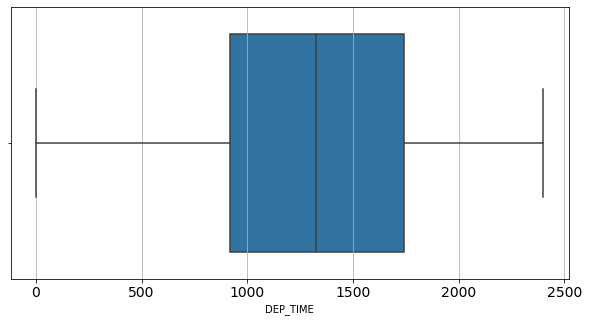

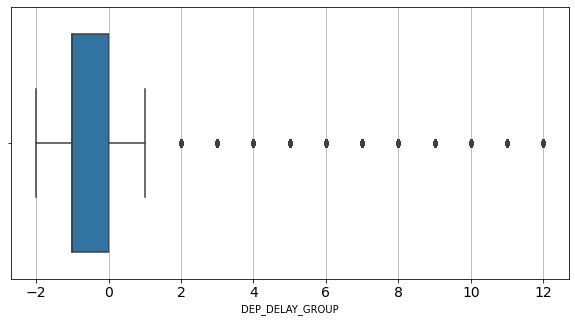

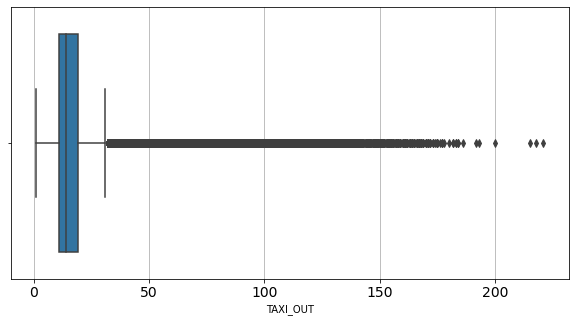

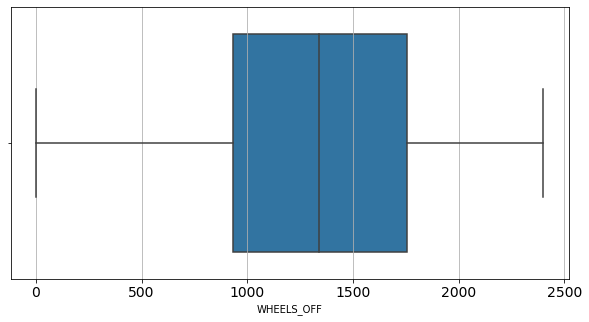

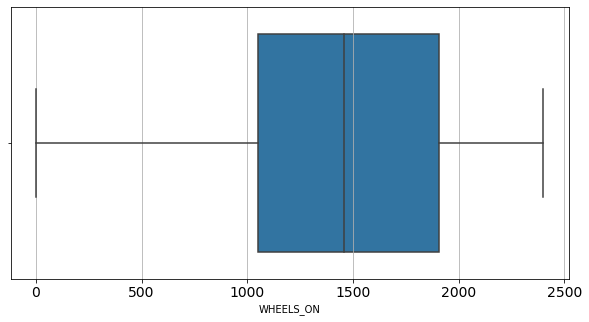

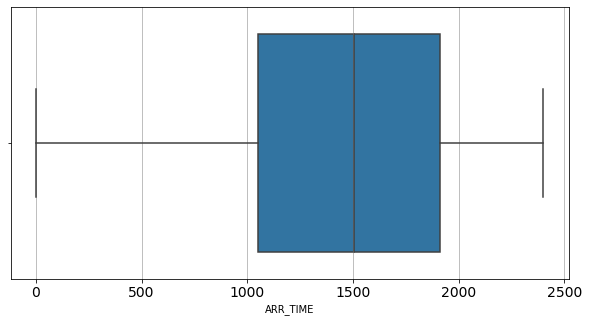

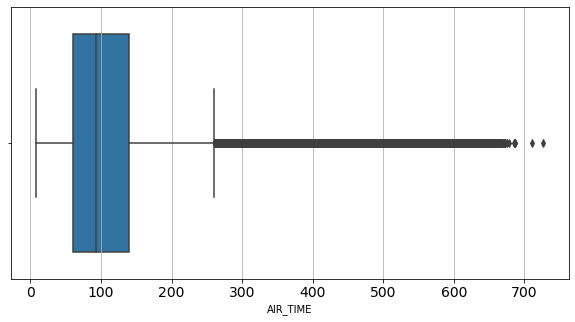

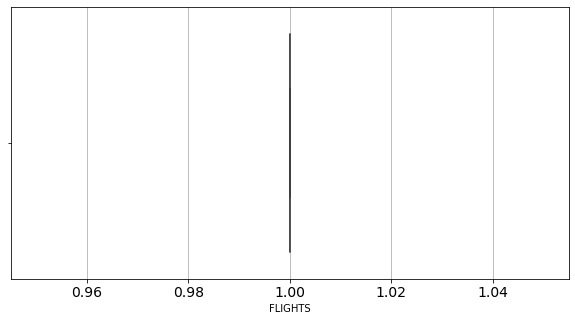

In [14]:
## NOW WE WILL CHECK FOR OUTLIERS, AS WE GOT AN INTUTION REGARDING OUTLIERS IN OUR NUMERICAL COLUMNS OF 'FLIGHT_RAW'

def check_outliers(df):
    for col in df.columns:
        fig,ax= plt.subplots(figsize=(10,5))
        plt.grid()
        sns.boxplot(x = df[col])
        plt.show()
        
check_outliers(NUMERICAL.drop('ARR_DEL15', axis = 1, inplace = False))

Here in the above results, three Columns: DEP_DELAY_GROUP, TAXI_OUT and AIR_TIME have many outliers, and we will try to use ***CAPPING*** technique to deal with outliers(replace outlier with 3rd quartile value) <br><br>

***NOTE:*** But in case of DEP_DELAY_GROUP, we have to ignore our search for outliers, since it represents a category. And in case of AIR_TIME, it is in form of 'hhmm' so we will not consider it as a numerical value. 
 
⛹ To analyse AIR_TIME and DEP_DELAY_GROUP in a better way, we will use distplot with kernel density estimation

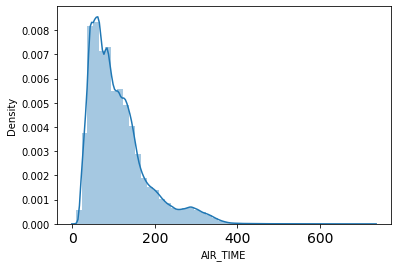

In [26]:
sns.distplot(NUMERICAL['AIR_TIME'], kde = True)

In [29]:
print(NUMERICAL['AIR_TIME'].quantile(0.90))

205.0


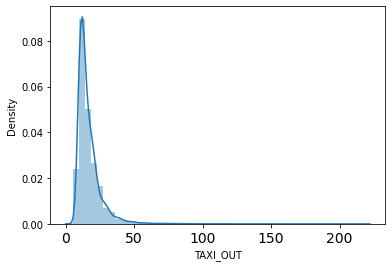

In [30]:
sns.distplot(NUMERICAL['TAXI_OUT'], kde = True)

In [32]:
print(NUMERICAL['TAXI_OUT'].quantile(0.90))

26.0


In [33]:
## NOW WE WILL REPLACE THE OUTLIERS WITH VALUES OF 90 PERCENTILE IN BOTH ABOVE COLUMNS. 

NUMERICAL["TAXI_OUT"] = np.where(NUMERICAL["TAXI_OUT"] >26.0, 26.0,NUMERICAL['TAXI_OUT'])
NUMERICAL["AIR_TIME"] = np.where(NUMERICAL["AIR_TIME"] >205.0, 205.0,NUMERICAL['AIR_TIME'])


Now we will deal with null values.

In [37]:
## CHECKING FOR NULL VALUES
NUMERICAL.isna().sum()

YEAR                    0
QUARTER                 0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
DEP_TIME           157274
DEP_DELAY_GROUP    157358
TAXI_OUT           160112
WHEELS_OFF         160112
WHEELS_ON          162606
ARR_TIME           162589
ARR_DEL15          175452
AIR_TIME           175452
FLIGHTS                 0
dtype: int64

In [38]:
CATEGORICAL.isna().sum()

OP_UNIQUE_CARRIER    0
TAIL_NUM             0
ORIGIN               0
ORIGIN_STATE_NM      0
DEST                 0
DEST_STATE_NM        0
DEP_TIME_BLK         0
ARR_TIME_BLK         0
dtype: int64

In [39]:
DATE_TIME.isna().sum()

DATE    0
dtype: int64

In [40]:
#TOTAL NUMBER OF ROWS HAVING NULL VALUES
NUMERICAL.isnull().any(axis=1).sum()

175452

In [44]:
## as we can see that total number of rows having null values, are approx 2% of the complete dataset, so we decided to drop them. 
NUMERICAL.dropna(axis = 0, inplace=True)

Now, we will look at complete data, how it looks

In [6]:
LB = LabelEncoder()

In [7]:
FLIGHT_RAW['OP_UNIQUE_CARRIER'] = LB.fit_transform(FLIGHT_RAW['OP_UNIQUE_CARRIER'])
FLIGHT_RAW['TAIL_NUM'] = LB.fit_transform(FLIGHT_RAW['TAIL_NUM'])
FLIGHT_RAW['ORIGIN'] = LB.fit_transform(FLIGHT_RAW['ORIGIN'])
FLIGHT_RAW['ORIGIN_STATE_NM'] = LB.fit_transform(FLIGHT_RAW['ORIGIN_STATE_NM'])
FLIGHT_RAW['DEST'] = LB.fit_transform(FLIGHT_RAW['DEST'])
FLIGHT_RAW['DEST_STATE_NM'] = LB.fit_transform(FLIGHT_RAW['DEST_STATE_NM'])
FLIGHT_RAW['DEP_TIME_BLK'] = LB.fit_transform(FLIGHT_RAW['DEP_TIME_BLK'])
FLIGHT_RAW['ARR_TIME_BLK'] = LB.fit_transform(FLIGHT_RAW['ARR_TIME_BLK'])

In [8]:
FLIGHT_RAW["TAXI_OUT"] = np.where(FLIGHT_RAW["TAXI_OUT"] >26.0, 26.0,FLIGHT_RAW['TAXI_OUT'])
FLIGHT_RAW["AIR_TIME"] = np.where(FLIGHT_RAW["AIR_TIME"] >205.0, 205.0,FLIGHT_RAW['AIR_TIME'])

In [9]:
FLIGHT_RAW.dropna(axis = 0, inplace=True)

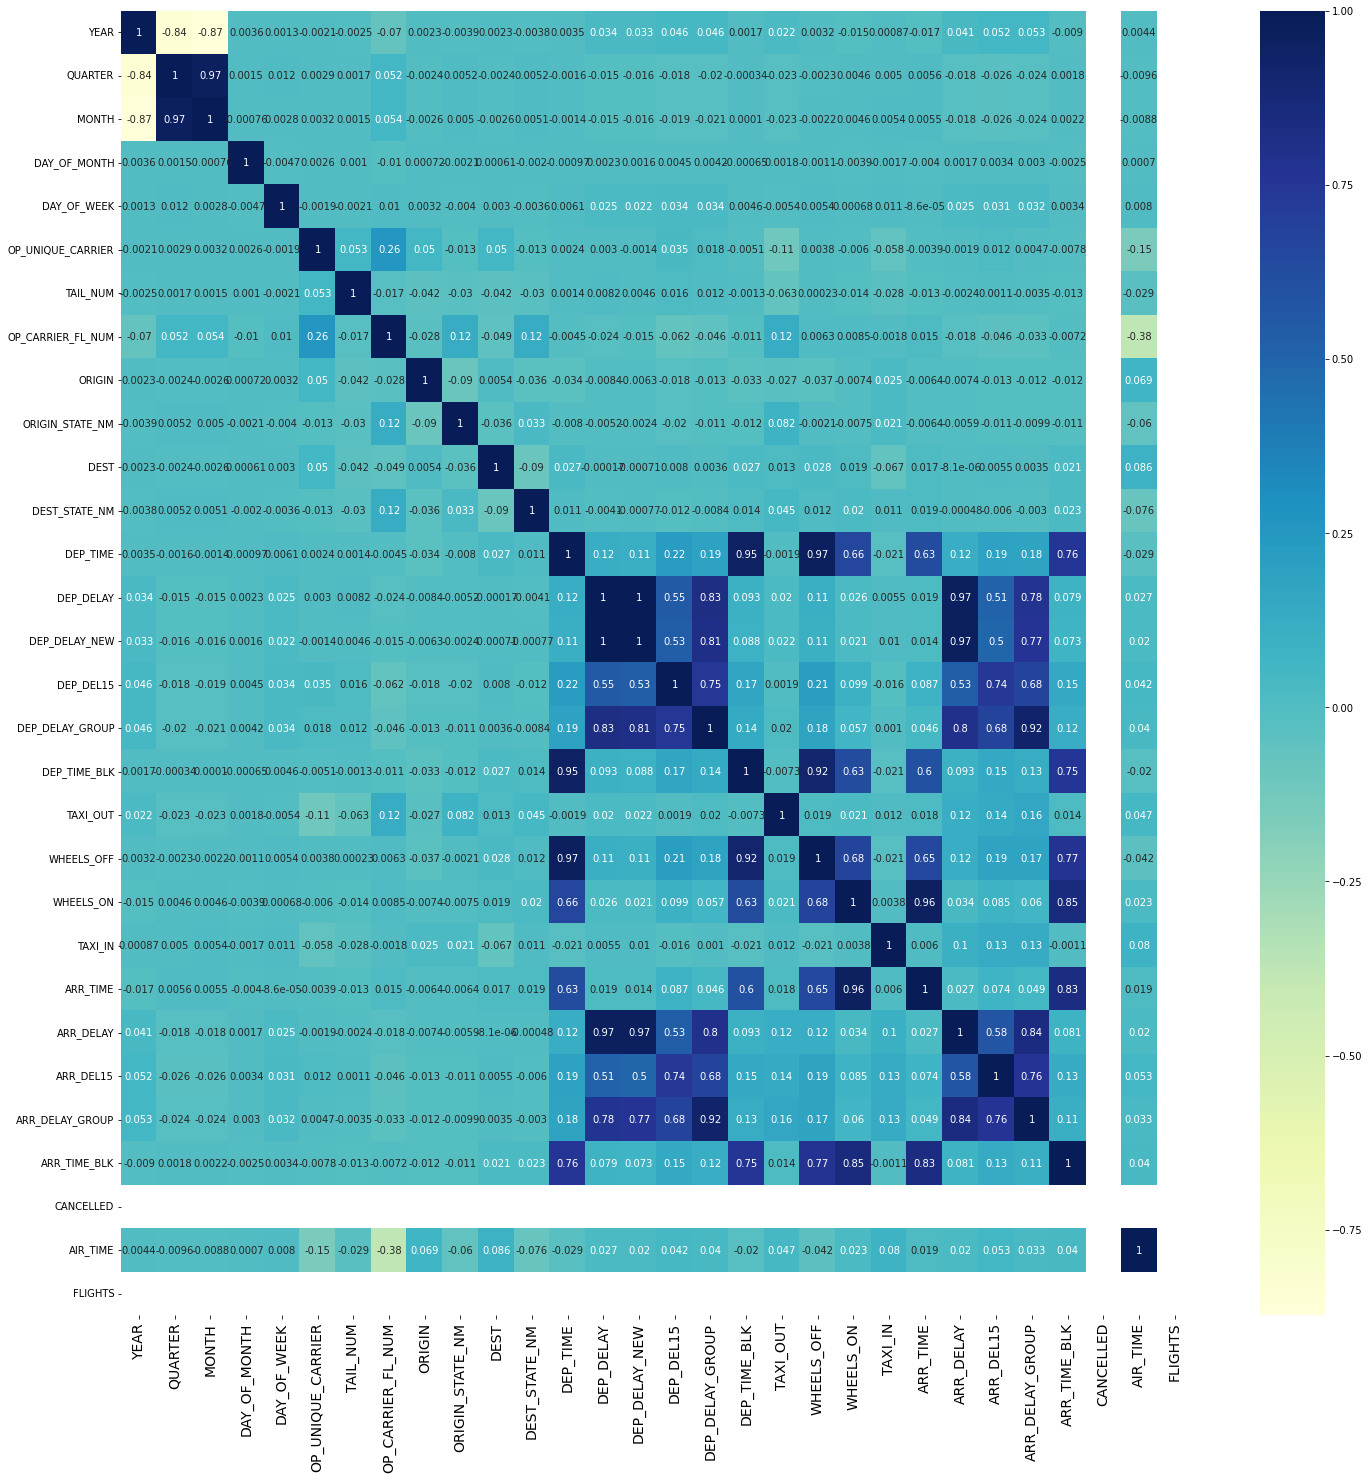

In [10]:
fig,ax = plt.subplots(figsize=(24,24))
sns.heatmap(FLIGHT_RAW.corr(),annot=True,cmap="YlGnBu")
plt.show()
#plt.savefig('C:/Users/yashy/Application of AI/final_Corr_mat.png', dpi=1000)

In [10]:
FLIGHT_RAW.drop(['ARR_TIME', 'WHEELS_ON','DEP_TIME_BLK', 'DEP_DELAY', 'ARR_TIME_BLK', 'WHEELS_OFF', 'DEP_DELAY_GROUP', 'DEP_DELAY_NEW', 'ARR_DELAY', 'ARR_DELAY_GROUP', 'DEP_DEL15'], axis=1, inplace=True)

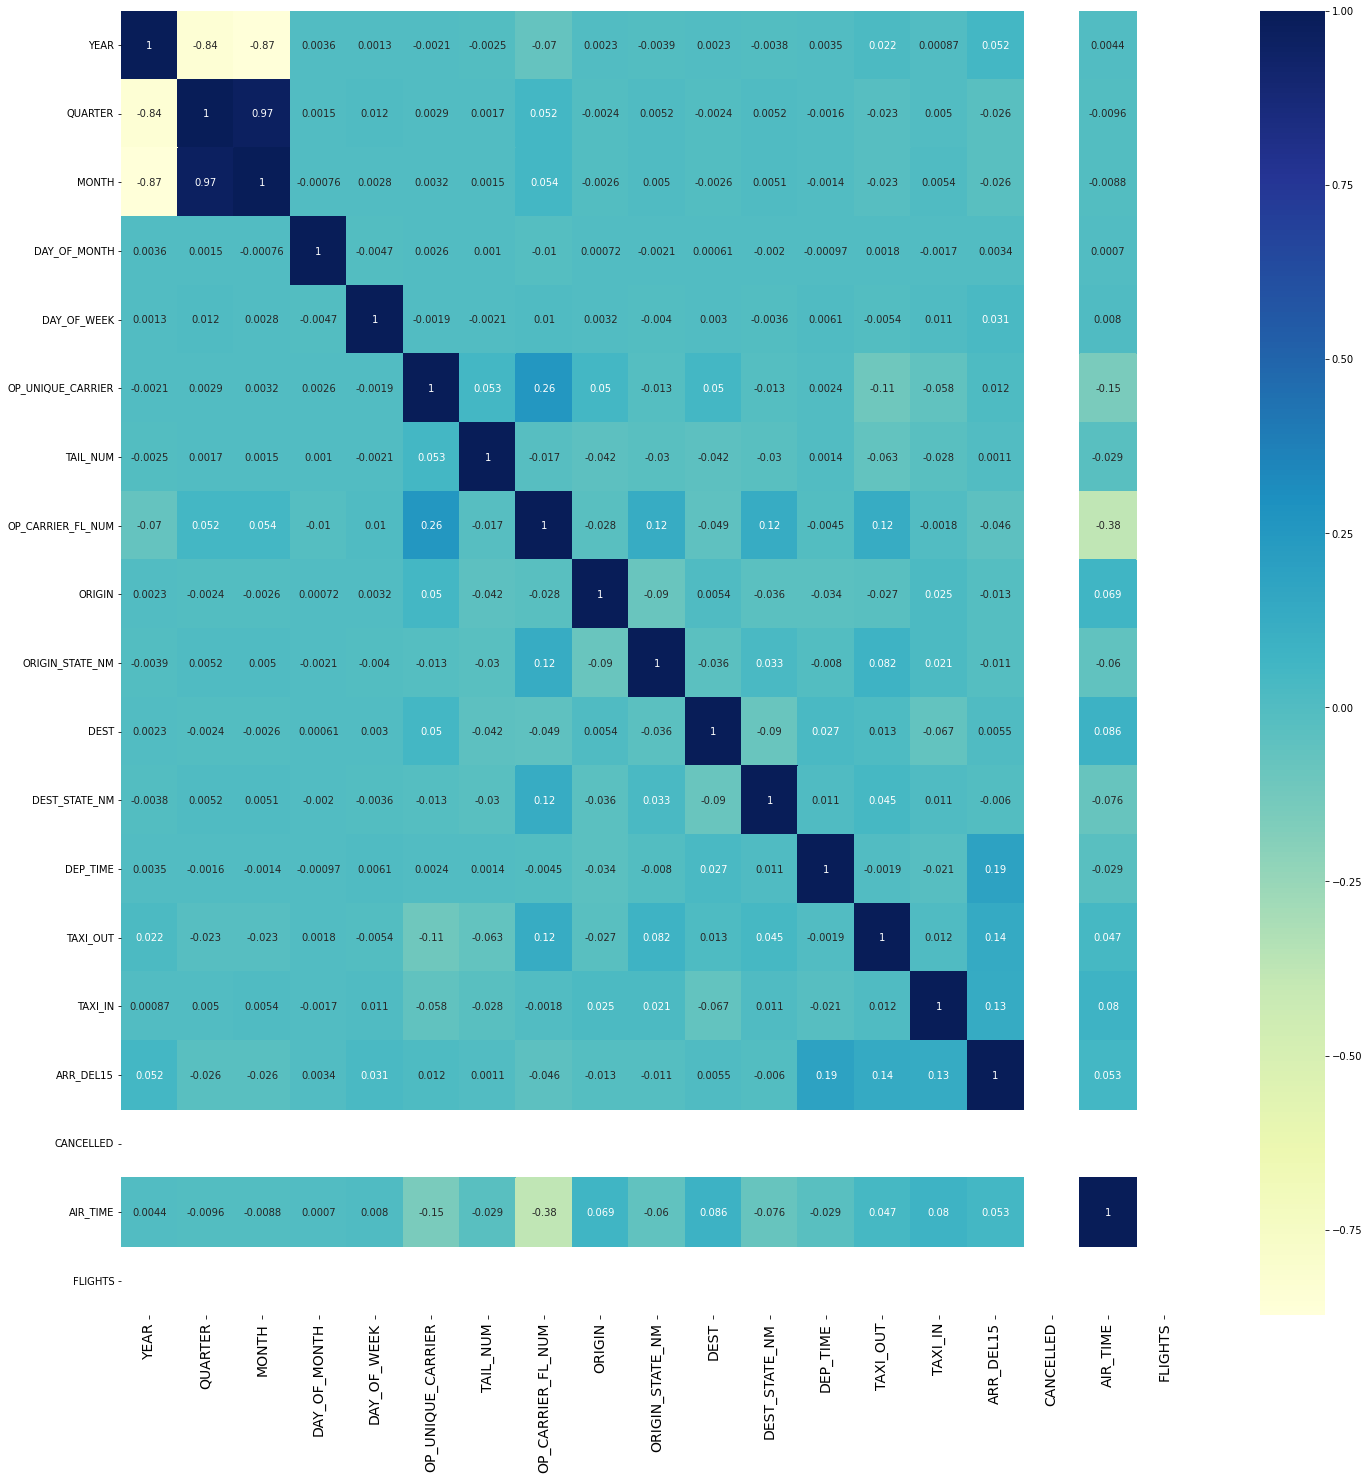

In [17]:
fig,ax = plt.subplots(figsize=(24,24))
sns.heatmap(FLIGHT_RAW.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Balancing Unbalanced Data using ***RANDOM UNDER SAMPLER***

In [11]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler()


In [13]:
df_X = FLIGHT_RAW.drop(['ARR_DEL15', 'DATE'], axis = 1)
df_Y = FLIGHT_RAW['ARR_DEL15']

## CONVERSION OF DATAT INTO ARRAY
X = df_X.values
y = df_Y.values

X_rus, y_rus = RUS.fit_resample(X, y)

In [91]:
Y_RUS = pd.DataFrame(y_rus, columns = ['ARR_DEL15'])
Y_RUS.value_counts()

ARR_DEL15
0.0          1248856
1.0          1248856
dtype: int64

In [84]:
#REFINED_FLIGHT_DATA = pd.to_csv('/content/drive/MyDrive/AI Project')